# Proyecto No.2 Data Science

Este notebook realiza el preprocesamiento y análisis exploratorio (EDA) de los datos del Mitsui & Co. Commodity Prediction Challenge. Se revisan las series de precios de commodities e índices (train.csv), limpiando valores faltantes, transformando datos y explorando distribuciones, volatilidad y correlaciones. El fin es comprender la estructura de los datos y preparar la información antes de aplicar modelos predictivos.

# Serie de precios de los activos 
## Carga y preprocesamiento de datos

En los siguientes bloques de cóodigo se quitaron los duplicados
Posteriormente se llenaron los datos nulos con el promedio de cada columna
Es decir, si hay un dato faltante para la columna del precio de Oro en JPX
Se obtuvo su promedio con los datos que habían en la columna y luego este valor se coloco en las celdas faltantes. 
Posteriormente se eliminaron columnas redundantes, se considero alta correlacion si entre las columnas había una correlacion arrba de 0.85
Finalmente se obtuvo el conjunto listo para el análisis exploratorio que se ha llamado data
Este ultimo conjunto de datos se usará para el modelado de la serie temporal

In [1]:
import pandas as pd   # Librería para manejar tablas (DataFrames)
df = pd.read_csv("train.csv") # Datos crudos: series de precios de los activos (una columna por activo).
df

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,0,2264.5,7205.0,2570.0,3349.0,NaN,NaN,NaN,NaN,NaN,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,1,2228.0,7147.0,2579.0,3327.0,NaN,NaN,NaN,NaN,NaN,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2,2250.0,7188.5,2587.0,3362.0,4684.0,4691.0,4684.0,3363.0,3367.0,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,3,2202.5,7121.0,2540.0,3354.0,4728.0,4737.0,4729.0,3430.0,3426.0,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,4,2175.0,7125.0,2604.0,3386.0,NaN,NaN,NaN,NaN,NaN,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1956,2629.5,9778.5,2010.0,2818.5,16041.0,16183.0,16046.0,6076.0,6073.0,...,1.842075,0.584336,0.819066,0.478610,0.048581,0.073181,0.078771,0.045312,14.606239,0.042097
1957,1957,2646.5,9860.0,2014.5,2838.5,NaN,NaN,NaN,NaN,NaN,...,1.844791,0.583610,0.816264,0.476380,0.048547,0.072941,0.078532,0.045315,14.502889,0.042089
1958,1958,2658.5,9919.5,2011.0,2860.0,16132.5,16261.0,16134.0,6200.0,6200.0,...,1.839538,0.583402,0.816093,0.476110,0.048495,0.073421,0.078794,0.045184,14.580416,0.042103
1959,1959,2651.0,9930.5,2032.0,2862.0,16214.5,16341.0,16211.0,6175.0,6195.0,...,1.847106,0.582341,0.822465,0.478955,0.048457,0.072909,0.078424,0.045193,14.492839,0.042015


In [2]:
print("Tipos de datos en el dataset")
df.dtypes

Tipos de datos en el dataset


date_id           int64
LME_AH_Close    float64
LME_CA_Close    float64
LME_PB_Close    float64
LME_ZS_Close    float64
                 ...   
FX_NOKGBP       float64
FX_NOKCHF       float64
FX_ZARCHF       float64
FX_NOKJPY       float64
FX_ZARGBP       float64
Length: 558, dtype: object

In [3]:
df.isna().sum()

date_id          0
LME_AH_Close    51
LME_CA_Close    51
LME_PB_Close    51
LME_ZS_Close    51
                ..
FX_NOKGBP        0
FX_NOKCHF        0
FX_ZARCHF        0
FX_NOKJPY        0
FX_ZARGBP        0
Length: 558, dtype: int64

In [4]:
"""
Se decide llenar el data set con la media de cada columna ya que al retirar los datos faltantes
el dataset se reduce a casi 250 observaciones, lo cual es una pérdida significativa que impactaría en el modelado posterior
"""
df_filled = df.copy()
df_filled = df_filled.fillna(df.mean(numeric_only=True))
print(df_filled.isna().sum())
df_filled

date_id         0
LME_AH_Close    0
LME_CA_Close    0
LME_PB_Close    0
LME_ZS_Close    0
               ..
FX_NOKGBP       0
FX_NOKCHF       0
FX_ZARCHF       0
FX_NOKJPY       0
FX_ZARGBP       0
Length: 558, dtype: int64


,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,0,2264.5,7205.0,2570.0,3349.0,7693.877507,7758.334417,7694.050407,3792.407046,3793.64607,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,1,2228.0,7147.0,2579.0,3327.0,7693.877507,7758.334417,7694.050407,3792.407046,3793.64607,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2,2250.0,7188.5,2587.0,3362.0,4684.000000,4691.000000,4684.000000,3363.000000,3367.00000,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,3,2202.5,7121.0,2540.0,3354.0,4728.000000,4737.000000,4729.000000,3430.000000,3426.00000,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,4,2175.0,7125.0,2604.0,3386.0,7693.877507,7758.334417,7694.050407,3792.407046,3793.64607,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1956,2629.5,9778.5,2010.0,2818.5,16041.000000,16183.000000,16046.000000,6076.000000,6073.00000,...,1.842075,0.584336,0.819066,0.478610,0.048581,0.073181,0.078771,0.045312,14.606239,0.042097
1957,1957,2646.5,9860.0,2014.5,2838.5,7693.877507,7758.334417,7694.050407,3792.407046,3793.64607,...,1.844791,0.583610,0.816264,0.476380,0.048547,0.072941,0.078532,0.045315,14.502889,0.042089
1958,1958,2658.5,9919.5,2011.0,2860.0,16132.500000,16261.000000,16134.000000,6200.000000,6200.00000,...,1.839538,0.583402,0.816093,0.476110,0.048495,0.073421,0.078794,0.045184,14.580416,0.042103
1959,1959,2651.0,9930.5,2032.0,2862.0,16214.500000,16341.000000,16211.000000,6175.000000,6195.00000,...,1.847106,0.582341,0.822465,0.478955,0.048457,0.072909,0.078424,0.045193,14.492839,0.042015


In [5]:
print("Cantidad duplicados")
print("Duplicados eliminados:", df_filled.duplicated().sum())

Cantidad duplicados
Duplicados eliminados: 0


In [6]:
"""
Ahora que ya tenemos un dataset limpio (sin nulos ni duplicados),
el siguiente paso es reducir la dimensionalidad eliminando variables redundantes.
Para ello calculamos la matriz de correlación absoluta entre todas las variables
y buscamos aquellas que tengan correlación superior a 0.8, ya que se consideran
altamente correlacionadas y por lo tanto aportan información muy similar.
Finalmente, eliminamos estas columnas redundantes de df_filled,
obteniendo un nuevo dataframe (df_reduced) más compacto, eficiente y con menor
riesgo de multicolinealidad, lo que facilitará tanto el análisis exploratorio
como la posterior construcción de modelos predictivos.
"""

# Se trabaja con df_filled ya que es el dataframe sin nulos ni duplicados
import numpy as np

corr_matrix = df_filled.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
df_reduced = df_filled.drop(cols_to_drop, axis=1)
data = df_reduced.copy()
data = data.drop("date_id",axis=1)
data

,LME_AH_Close,LME_PB_Close,JPX_Gold_Mini_Futures_Volume,JPX_Gold_Rolling-Spot_Futures_Volume,JPX_Gold_Standard_Futures_Volume,JPX_Platinum_Mini_Futures_Volume,JPX_Platinum_Standard_Futures_Volume,JPX_RSS3_Rubber_Futures_Volume,JPX_Gold_Mini_Futures_open_interest,JPX_Gold_Rolling-Spot_Futures_open_interest,...,US_Stock_VTV_adj_volume,US_Stock_VXUS_adj_volume,US_Stock_VYM_adj_volume,US_Stock_WMB_adj_volume,US_Stock_WPM_adj_volume,US_Stock_X_adj_volume,US_Stock_XLB_adj_volume,FX_EURAUD,FX_AUDNZD,FX_EURCAD
0,2264.5,2570.0,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,73768.673713,...,1925989.0,1937809.0,1534451.0,4480305.0,1918509.0,1.199470e+07,8979239.0,1.540368,1.103011,1.508946
1,2228.0,2579.0,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,73768.673713,...,1236706.0,1391297.0,1170263.0,8969474.0,2899390.0,1.210980e+07,4952274.0,1.534906,1.104186,1.507524
2,2250.0,2587.0,2681.00000,37908.000000,30656.000000,624.00000,13713.00000,4128.000000,1768.000000,128380.000000,...,1501979.0,1298665.0,964661.0,7298642.0,2029410.0,9.990157e+06,4120092.0,1.535084,1.098776,1.507930
3,2202.5,2540.0,3523.00000,30791.000000,35267.000000,525.00000,17629.00000,4586.000000,2026.000000,128145.000000,...,1328483.0,1341229.0,1280244.0,6366688.0,2201174.0,1.232388e+07,4671998.0,1.527972,1.098275,1.492598
4,2175.0,2604.0,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,73768.673713,...,1421356.0,1006768.0,1469662.0,5546048.0,3057977.0,1.137100e+07,4539115.0,1.525623,1.093475,1.486463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,2629.5,2010.0,5968.00000,1307.000000,21614.000000,642.00000,8170.00000,255.000000,3341.000000,41729.000000,...,3294001.0,3851587.0,1119771.0,7919252.0,1140937.0,1.172494e+07,6811899.0,1.786168,1.091048,1.596192
1957,2646.5,2014.5,5721.83794,6663.717615,27899.320325,975.99458,8623.97832,1965.642818,3786.026558,73768.673713,...,2097264.0,4320787.0,1151769.0,6889734.0,1529026.0,1.172494e+07,5315525.0,1.791509,1.093704,1.599372
1958,2658.5,2011.0,11875.00000,1767.000000,33544.000000,2241.00000,6897.00000,323.000000,3393.000000,41479.000000,...,2699670.0,3056042.0,1088104.0,5390566.0,3027641.0,1.172494e+07,6825474.0,1.791038,1.092632,1.597050
1959,2651.0,2032.0,10931.00000,1759.000000,32592.000000,643.00000,9512.00000,335.000000,3497.000000,41128.000000,...,2746323.0,4210134.0,839982.0,6757220.0,1973982.0,1.172494e+07,6747213.0,1.783354,1.091889,1.601524


# Inicio Análisis Exploratorio 

Dado que el conjunto inicial de datos, a pesar de haber reducido la cantidad de variables siguientes siendo un montón
Lo que se ha hecho es implementar el algoritmo Kmeans para separar las variables por grupos. De esa manera se reducía bastante las variables en cada grupo lo que facilita el análisis exploratorio. 

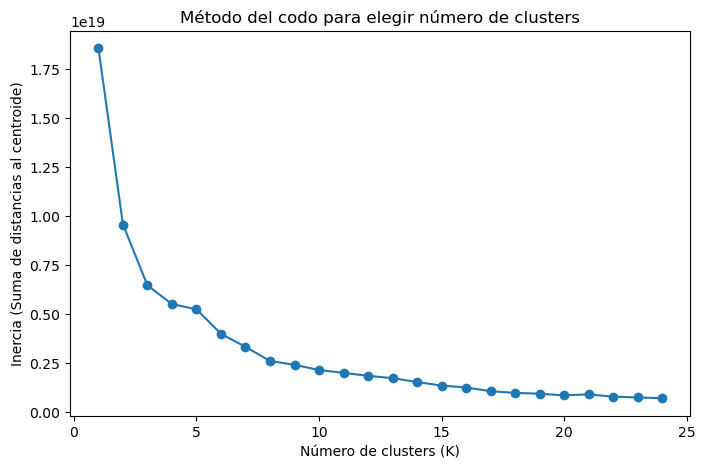

In [18]:
"""
La idea ahora es hacer que las variables estén en las filas
para poder aplicar Kmeans
y agrupar variables que se parecen entre sí en su evolucion temporal
"""
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

matriz = data.to_numpy()
matrizTranspuesta = matriz.T

# Lista para guardar las inercias
inertias = []

# Probar distintos valores de K
K_range = range(1, 25)  # de 1 a 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(matrizTranspuesta)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.title("Método del codo para elegir número de clusters")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (Suma de distancias al centroide)")
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler

num_df = data.select_dtypes(include="number").copy()
colnames = num_df.columns

# 1) Matriz transpuesta: filas = variables, columnas = tiempo
matrizT = num_df.to_numpy().T

# 2) Estandarizar (muy importante para KMeans)
matrizT_scaled = StandardScaler().fit_transform(matrizT)

# 3) KMeans con K=6 (agrupa variables)
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(matrizT_scaled)

# 4) Tabla variable → cluster
variable_clusters = pd.DataFrame({"variable": colnames, "cluster": labels}).sort_values("cluster")
variable_clusters

,variable,cluster
32,US_Stock_COP_adj_volume,0
62,US_Stock_MPC_adj_volume,0
56,US_Stock_JNK_adj_volume,0
53,US_Stock_IEF_adj_volume,0
49,US_Stock_GLD_adj_volume,0
41,US_Stock_EWJ_adj_volume,0
38,US_Stock_EMB_adj_volume,0
36,US_Stock_DVN_adj_volume,0
34,US_Stock_CVX_adj_volume,0
33,US_Stock_CVE_adj_volume,0


In [40]:
print(variable_clusters["cluster"].value_counts().sort_index())

cluster
0    20
1     1
2    12
3     3
4    68
5     1
Name: count, dtype: int64


In [43]:
vars_cluster0 = variable_clusters.loc[variable_clusters["cluster"] == 0, "variable"].tolist()
vars_cluster1 = variable_clusters.loc[variable_clusters["cluster"] == 1, "variable"].tolist()
vars_cluster2 = variable_clusters.loc[variable_clusters["cluster"] == 2, "variable"].tolist()
vars_cluster3 = variable_clusters.loc[variable_clusters["cluster"] == 3, "variable"].tolist()
vars_cluster4 = variable_clusters.loc[variable_clusters["cluster"] == 4, "variable"].tolist()
vars_cluster5 = variable_clusters.loc[variable_clusters["cluster"] == 5, "variable"].tolist()

df0 = data[vars_cluster0].copy()
df1 = data[vars_cluster1].copy()
df2 = data[vars_cluster2].copy()
df3 = data[vars_cluster3].copy()
df4 = data[vars_cluster4].copy()
df5 = data[vars_cluster5].copy()

# Análisis Exploratorio Grupo 0

# Análisis Exploratorio Grupo 1

# Análisis Exploratorio Grupo 2

# Análisis Exploratorio Grupo 3

# Análisis Exploratorio Grupo 4

# Análisis Exploratorio Grupo 5